# <u>Group Project: Kickstarter Campaign</u>

Kickstarter is a company that provides the space for independent artists, creative, innovators, and entrepreneurs to bring their unique projects to life. Kickstarter allows anyone to financially support the project through an online pledging system - this means; anyone can pledge a specific amount of money towards the funding goal of the project. Kickstarter projects (also called campaigns) are all-or-nothing -- meaning, if the funding goal isn't met 100% (or exceeded), the project campaign fails and no funding is provided. The stakes are high - but what is it about certain campaigns that make them succeed while others fail? 

You have joined the marketing team for Kickstarter and you are tasked with exploring the features of several campaigns over the past few years. You are responsible for looking at this dataset and pulling out key insights about the characteristics of Kickstarter campaigns that make them more likely to succeed or fail. The marketing team at Kickstarter has a limited amount of funds to devote to highlighting specific projects, and they want to highlight projects that have the best chance of succeeding (i.e. meeting the funding goal). Can you help them determine who that might be?

Complete the steps below to take a dataset from inception to insights, for the purpose of answering the following two questions:

    1. What kinds of projects should the Kickstarter Marking Team focus their attention on?
    2. Why should the Marketing Team focus their attention in that direction?

After you have combed through the data, your group will put together a presentation (including visualizations), that clearly answers the two questions above. The Kickstarter dataset is posted to Canvas. Complete the code in the notebook below to complete the project. <b> You are NOT restricted to the steps laid out in this notebook to complete your project, You can conduct additional analyses or create additional visualizations. This notebook is everything you need to cover, but feel free to expand on these steps! This includes completing regression analyses with the dataset.</b>

## <font color=red>Part 1: Domain Knowledge</font>

Before you begin looking at the data, you need to expand your knowledge of the subject matter. Start by visiting www.kickstarter.com and read all you can about the company. What is the objective of the company? How does it work? What does the project timeline look like? You should research the company until you feel comfortable speaking about the basics of Kickstarter projects. Use the space below (double-click the cell to activate) to write a brief paragraph about what you learned about Kickstarter. 

### <font color=red>Questions to Answer</font>
1. What is Kickstarter?
2. What is the purpose of Kickstarter?
3. Who are the "backers" of a Kickstarter campaign?
4. How is success determined for a project campaign?

****

### <font color=red>KICKSTARTER INFORMATION</font>

#### Start your paragraph here . . . Be sure to answer all questions in this space!
                                 
  ## Answer for the above three question

1.Kickstarter is a company that brings different creative projects  and then organizes online funding campaign to attract anyone who want to financially support this creative projects.

2.The purpose of Kickstarter is to bring those well funded  creative projects to reality.

3.Anyone who pledges a specific amount of money for the creative projects are called  the backers of kickstarter. 

4.The project campaign success is detrmined if and only the amount of money pledged for the project meet 100 % or more of the funding goal.


## <font color=darkorange>Part 2: Data Import and Cleaning</font>

Now that you are familiar with where the data is coming from, you are ready to start examining the data. The Kickstarter Dataset is a collection of project campaign information from 2016. Data includes information about the project name, length, country of origin, goal, and the amount of money raised, etc. If you open the Kickstarter Dataset in excel, the second tab provides descriptions of each of the columns/variables. Import the dataset into this notebook and follow the steps below to gather information about the data and to clean up the dataset. Use the space below (double-click the cell to activate) to write a brief paragraph describing the dataset and the steps you took while cleaning the data. 

### <font color=darkorange>Questions to Answer</font>
1. How many columns are in the dataset? How many rows?
2. What type of variables (continuous, categorical) make up this dataset?
3. Which variables have missing values? 
4. How did you handle the missing data in the dataset?
5. How many rows are in your dataset after handling missing data?
6. Are there any odd or inappropriate values within a column that don't make sense? If so, what are they?
7. What percentage of the each project was funded? In other words, how close were they to reaching the goal? You will need to create a new variable to answer this question.

***

### <font color=darkorange>DATASET INFORMATION AND CLEANING</font>

#### Start your paragraph here . . . Be sure to answer all questions in this space!

### Answer for the above questions 

1. there are  14 columns and 281856 rows 
2. the dataset is a collection of categorical data like  name, main_category, category,country,currency and state, as well as the continous data like launched, deadline, length_days, goal, pledged, usd pledged and backers	
3. name and usd pledged have missing values
4. the missing data can be dropped or filled by other values
5. there are 281646 rows after handling missing data
6. the followings are inappropriate values within a column that don't make sense: ID, name, pledged,launched and deadline


In [55]:
## import libraries and import Kickstarter dataset
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import statsmodels.formula. api as sm
import seaborn as sns

## this is a large dataset, we want to see all rows 
#pd.set_option('display.max_rows', None)


## this is a very large dataset, be patient, it may take a while to import!!
df = pd.read_excel('kickstarter_Dataset.xlsx')



In [56]:
df.head()

,ID,name,main_category,category,country,currency,launched,deadline,length_days,goal,pledged,usd pledged,backers,state
0,1009317190,French Cuisine,Food,Cookbooks,US,USD,2014-08-09 03:16:02,2014-09-08 00:46:23,29,13730.0,3984.0,3984.000000,46,failed
1,1618024139,HotRod Henry SUPERCHARGED - the ultimate 3D pr...,Technology,3D Printing,AT,EUR,2016-06-16 16:30:33,2016-07-21 23:59:00,35,75000.0,7386.0,1561.784015,31,failed
2,2004838949,PHAbulous Philaments - 3D printing: natural an...,Technology,3D Printing,AT,EUR,2015-07-22 12:08:26,2015-08-21 12:08:26,30,15000.0,3834.0,4152.402045,46,failed
3,258770123,Schokostruder - Chocolate & Liquid Extruder f...,Technology,3D Printing,AT,EUR,2016-01-25 18:48:09,2016-02-24 18:48:09,30,20000.0,18.0,19.435528,6,failed
4,690137136,StarterMate - the 3D printing starter kit for ...,Technology,3D Printing,AT,EUR,2015-09-30 00:26:43,2015-11-09 00:26:43,40,20000.0,2598.0,2908.076574,29,failed


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281856 entries, 0 to 281855
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   ID             281856 non-null  int64         
 1   name           281821 non-null  object        
 2   main_category  281856 non-null  object        
 3   category       281856 non-null  object        
 4   country        281856 non-null  object        
 5   currency       281856 non-null  object        
 6   launched       281856 non-null  datetime64[ns]
 7   deadline       281856 non-null  datetime64[ns]
 8   length_days    281856 non-null  int64         
 9   goal           281856 non-null  float64       
 10  pledged        281856 non-null  float64       
 11  usd pledged    281646 non-null  float64       
 12  backers        281856 non-null  int64         
 13  state          281856 non-null  object        
dtypes: datetime64[ns](2), float64(3), int64(3), object(6

In [58]:
## determine dataset shape (number of rows and columns)
df.shape


(281856, 14)

In [59]:
## determine dataset features (info) and data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281856 entries, 0 to 281855
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   ID             281856 non-null  int64         
 1   name           281821 non-null  object        
 2   main_category  281856 non-null  object        
 3   category       281856 non-null  object        
 4   country        281856 non-null  object        
 5   currency       281856 non-null  object        
 6   launched       281856 non-null  datetime64[ns]
 7   deadline       281856 non-null  datetime64[ns]
 8   length_days    281856 non-null  int64         
 9   goal           281856 non-null  float64       
 10  pledged        281856 non-null  float64       
 11  usd pledged    281646 non-null  float64       
 12  backers        281856 non-null  int64         
 13  state          281856 non-null  object        
dtypes: datetime64[ns](2), float64(3), int64(3), object(6

In [60]:
## determine which variables have missing data 

df.isnull().sum()

ID                 0
name              35
main_category      0
category           0
country            0
currency           0
launched           0
deadline           0
length_days        0
goal               0
pledged            0
usd pledged      210
backers            0
state              0
dtype: int64

In [61]:
## handling missing data

## fill all the missing values in "name" with "Unknown Project Name"

df['name'].fillna('Unknown', inplace = True)

## drop all the rows where "usd pledged" is missing
df.head()


,ID,name,main_category,category,country,currency,launched,deadline,length_days,goal,pledged,usd pledged,backers,state
0,1009317190,French Cuisine,Food,Cookbooks,US,USD,2014-08-09 03:16:02,2014-09-08 00:46:23,29,13730.0,3984.0,3984.000000,46,failed
1,1618024139,HotRod Henry SUPERCHARGED - the ultimate 3D pr...,Technology,3D Printing,AT,EUR,2016-06-16 16:30:33,2016-07-21 23:59:00,35,75000.0,7386.0,1561.784015,31,failed
2,2004838949,PHAbulous Philaments - 3D printing: natural an...,Technology,3D Printing,AT,EUR,2015-07-22 12:08:26,2015-08-21 12:08:26,30,15000.0,3834.0,4152.402045,46,failed
3,258770123,Schokostruder - Chocolate & Liquid Extruder f...,Technology,3D Printing,AT,EUR,2016-01-25 18:48:09,2016-02-24 18:48:09,30,20000.0,18.0,19.435528,6,failed
4,690137136,StarterMate - the 3D printing starter kit for ...,Technology,3D Printing,AT,EUR,2015-09-30 00:26:43,2015-11-09 00:26:43,40,20000.0,2598.0,2908.076574,29,failed


In [62]:
df.dropna(subset = ['usd pledged'], inplace =True)
df.head()

,ID,name,main_category,category,country,currency,launched,deadline,length_days,goal,pledged,usd pledged,backers,state
0,1009317190,French Cuisine,Food,Cookbooks,US,USD,2014-08-09 03:16:02,2014-09-08 00:46:23,29,13730.0,3984.0,3984.000000,46,failed
1,1618024139,HotRod Henry SUPERCHARGED - the ultimate 3D pr...,Technology,3D Printing,AT,EUR,2016-06-16 16:30:33,2016-07-21 23:59:00,35,75000.0,7386.0,1561.784015,31,failed
2,2004838949,PHAbulous Philaments - 3D printing: natural an...,Technology,3D Printing,AT,EUR,2015-07-22 12:08:26,2015-08-21 12:08:26,30,15000.0,3834.0,4152.402045,46,failed
3,258770123,Schokostruder - Chocolate & Liquid Extruder f...,Technology,3D Printing,AT,EUR,2016-01-25 18:48:09,2016-02-24 18:48:09,30,20000.0,18.0,19.435528,6,failed
4,690137136,StarterMate - the 3D printing starter kit for ...,Technology,3D Printing,AT,EUR,2015-09-30 00:26:43,2015-11-09 00:26:43,40,20000.0,2598.0,2908.076574,29,failed


In [63]:
df.shape

(281646, 14)

In [64]:
## inappropriate values in categorical variables; check value counts
df['name'].value_counts()


Unknown                                         38
New EP/Music Development                        13
New EP / Music Development                      10
Music Video                                      9
Reflections                                      9
                                                ..
Freak Football - Instructional Video Program     1
Intro Vids!                                      1
White Heart                                      1
Pastor John                                      1
Fathers: Balancing Family & Art                  1
Name: name, Length: 279890, dtype: int64

In [65]:
## drop unneeded columns (project ID, name, pledged, launched, deadline)
# you will use usd pledged from now on

df.drop(columns = ['ID', 'name', 'pledged', 'launched', 'deadline'], inplace =True)
df.head()

,main_category,category,country,currency,length_days,goal,usd pledged,backers,state
0,Food,Cookbooks,US,USD,29,13730.0,3984.000000,46,failed
1,Technology,3D Printing,AT,EUR,35,75000.0,1561.784015,31,failed
2,Technology,3D Printing,AT,EUR,30,15000.0,4152.402045,46,failed
3,Technology,3D Printing,AT,EUR,30,20000.0,19.435528,6,failed
4,Technology,3D Printing,AT,EUR,40,20000.0,2908.076574,29,failed


In [66]:
# create a new column
## percentage of project that was funded - how close were they to reaching the goal?

df["pct_funded"] = (df["usd pledged"]/df["goal"])*100
df.head()

,main_category,category,country,currency,length_days,goal,usd pledged,backers,state,pct_funded
0,Food,Cookbooks,US,USD,29,13730.0,3984.000000,46,failed,29.016752
1,Technology,3D Printing,AT,EUR,35,75000.0,1561.784015,31,failed,2.082379
2,Technology,3D Printing,AT,EUR,30,15000.0,4152.402045,46,failed,27.682680
3,Technology,3D Printing,AT,EUR,30,20000.0,19.435528,6,failed,0.097178
4,Technology,3D Printing,AT,EUR,40,20000.0,2908.076574,29,failed,14.540383


In [67]:
## <font color=#EAC117>Part 3: Exploratory Analysis</font>

#With a clean dataset, you are now ready to start exploring the variables in your dataset. Don't worry about how your variables relate to each other - we will cover that in the next section. For now, it's more important that you get a clear sense of the variable characteristics on their own. Follow the steps below to explore all of the variables within your dataset and preform descriptive statistics. In addition to the descriptive statistics, you are tasked with creating a visualizations related to your results. Stylistic choices related to the visualizations is up to your group. Use the space below (double-click the cell to activate) to write a brief paragraph describing the steps you took to explore the data. 

### <font color=#EAC117>Questions to Answer</font>
#1.	What is the average (mean) for the following variables: goal, usd pledged, backers, and length? 
#2.	What is the maximum value, minimum value, and range for the following variables: goal, usd pledged, backers, and length?
#3.	What is the most common (mode) length for campaign projects?
#4.	Considering the categorical variables, what is the most frequent main category group? How many projects are classified under this category? What is the most frequent sub-category? How many projects are classified under this category? 
#5.	Considering the categorical variables, what is the least frequent main category group? How many projects are classified under this category? What is the least frequent sub-category? How many projects are classified under this category? 
#6.	Which country has started the most Kickstarter campaigns?
#7.	How many projects have failed? How many projects have succeeded?

### <font color=#EAC117>Visualizations to Create</font> 
#* Number of Projects by Main Category
#* Number of projects by State (outcome)
#* Number of projects from each country
#* Number of successful projects and failed projects by Main Category



### <font color=#EAC117>EXPLORATORY DATA ANALYSIS</font>

#### Start your paragraph here . . . Be sure to answer all questions in this space!

# Answer for the above questions

#1.                       # Mean                  # Maximum value        # Minimum value     # Range
       
        #goal             41815.969             100000000                0.01               99999999.99
        
#2.    # usd pledged       8575.848              20338986                 0.0                20338986

       # backers           111.939                219382                    0                 20338986
       #length_days        33.976                  92                      1                  91
    
#3. The most common (mode) lenght is 30 days
#4. Film and video are the most frequent in main category, there are 51108 projects under this category. Product design is the most frequent in sub category, there are 14539 projects under this category.
#5. Dance is the least frequent in main category, there are 3195 projects in this category. Taxidermy is the least frequent in sub category, there are 9 projects under this category
#6. US has started the most kickstarter campaign
#7. 168503 projects have failed, 113143 projects have succeeded


In [68]:
#1. the average (mean) for the following variables: goal, usd pledged, backers, and length? 
 

df['goal'].mean()

41815.969287154796

In [69]:
df['usd pledged'].mean()

8575.848288233132

In [70]:
df['backers'].mean()

111.9348011333376

In [71]:
df['length_days'].mean()

33.97652017071075

In [72]:
# 2. the maximum value, minimum value

df['goal'].max()

100000000.0

In [73]:
df['usd pledged'].max()

20338986.27

In [74]:
df['backers'].max()

219382

In [75]:
df['length_days'].max()

92

In [76]:
df['goal'].min()

0.01

In [77]:
df['usd pledged'].min()

0.0

In [78]:
df['backers'].min()

0

In [79]:
df['length_days'].min()

1

In [80]:
## calculate the range for all numeric variables

In [81]:
g_range = df['goal'].max() - df['goal'].min()
print(g_range)

99999999.99


In [82]:
p_range = df['usd pledged'].max() - df['usd pledged'].min()
print(p_range)

20338986.27


In [83]:
b_range = df['backers'].max() - df['backers'].min()
print(b_range)

219382


In [84]:
l_range = df['length_days'].max() - df['length_days'].min()
print(l_range)

91


In [85]:
#3. calculating the mode

df['length_days'].mode()

0    30
dtype: int64

In [86]:
df['main_category'].mode()


0    Film & Video
dtype: object

In [87]:
df['category'].mode()

0    Product Design
dtype: object

In [88]:
df['usd pledged'].mode()

0    0.0
dtype: float64

In [89]:
df['backers'].mode()

0    0
dtype: int64

In [90]:
df['length_days'].mode()

0    30
dtype: int64

In [91]:
#4.most  frequency of  main categorical variable groups

# film and video is the most frequent  in the main category
# there are 51108 projects under this category

# dance is the least frequent in the main category
# there are 3195 projects under this category

df['main_category'].value_counts()


Film & Video    51108
Music           40868
Publishing      30254
Games           22429
Art             21805
Technology      21444
Design          20032
Food            18899
Fashion         15839
Theater          9340
Photography      8668
Comics           7918
Crafts           6310
Journalism       3537
Dance            3195
Name: main_category, dtype: int64

In [92]:
#5.most  frequency of  sub categorical variable groups

# 5.product and design is the most frequent in the sub category
# there are 14539 projects under this category

#taxidermy is the least frequent in the sub category
# there are 9 projects under this category

df['category'].value_counts()

Product Design    14539
Documentary       13371
Shorts            10786
Music             10744
Food               9545
                  ...  
Weaving              59
Residencies          52
Letterpress          34
Chiptune             31
Taxidermy             9
Name: category, Length: 158, dtype: int64

In [93]:
#6. which country the most started kickstarter
# US has statted the most kickstarter campaign

df['country'].value_counts()

US    229826
GB     23877
CA      9912
AU      5195
DE      2131
NL      1873
FR      1559
IT      1394
ES      1090
SE      1066
NZ       993
DK       672
IE       473
NO       430
CH       389
BE       329
AT       283
SG        70
HK        47
LU        33
MX         4
Name: country, dtype: int64

In [94]:
#7. how many project failed and succeeded

df['state'].value_counts()

failed        168503
successful    113143
Name: state, dtype: int64

C:\Users\tegen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='main_category', ylabel='count'>

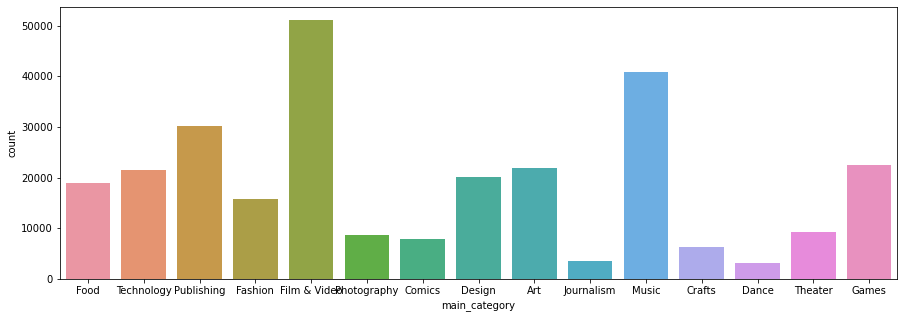

In [95]:
# visualization

#number of projects by main category , 
plt.figure(figsize=(15,5))


sns.countplot(df['main_category'])

C:\Users\tegen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='category', ylabel='count'>

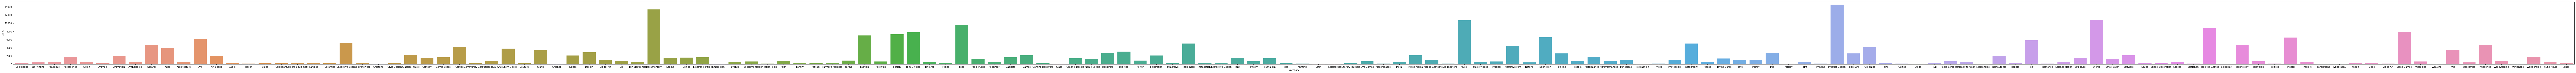

In [96]:
#number of projects by category
plt.figure(figsize=(200,5))


sns.countplot(df['category'])

C:\Users\tegen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='state', ylabel='count'>

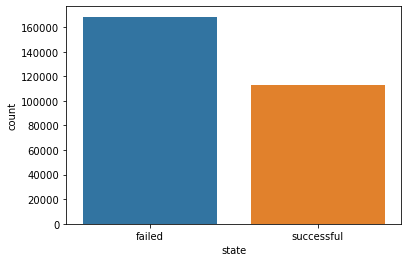

In [97]:
# number of projects by state(success & failed)

sns.countplot(df['state'])

C:\Users\tegen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='country', ylabel='count'>

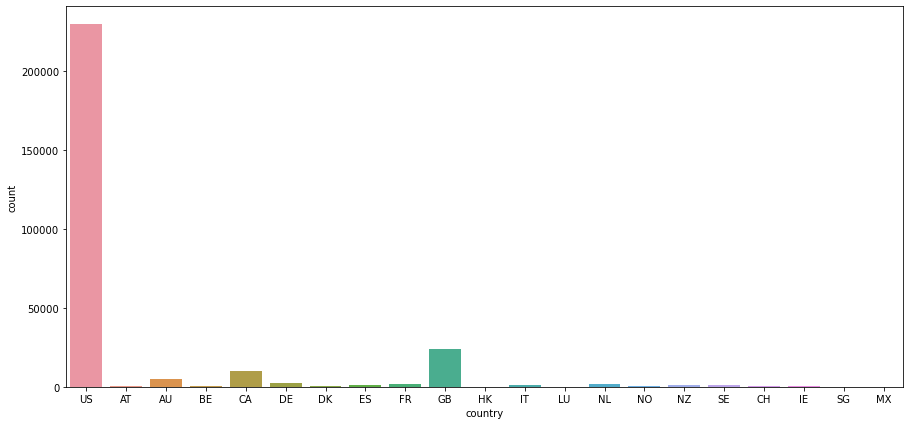

In [98]:
# number of projects by country

plt.figure(figsize=(15,7))

sns.countplot(df['country'])

In [99]:
# number of successful and failed projects

pd.crosstab(df['main_category'], df['state'], margins = True) 

state,failed,successful,All
main_category,,,
Art,12128,9677,21805
Comics,3411,4507,7918
Crafts,4637,1673,6310
Dance,1091,2104,3195
Design,12063,7969,20032
Fashion,11520,4319,15839
Film & Video,29696,21412,51108
Food,13632,5267,18899
Games,13033,9396,22429


In [100]:
pd.crosstab(df['category'], df['state'], margins = True) 

state,failed,successful,All
category,,,
3D Printing,262,193,455
Academic,442,148,590
Accessories,1141,597,1738
Action,418,77,495
Animals,144,55,199
...,...,...,...
Workshops,79,40,119
World Music,870,842,1712
Young Adult,430,138,568


In [101]:
# success and failed projects in main category

pd.crosstab(df['main_category'], df['state'], normalize = 'index') 

state,failed,successful
main_category,,
Art,0.556203,0.443797
Comics,0.430791,0.569209
Crafts,0.734865,0.265135
Dance,0.341471,0.658529
Design,0.602187,0.397813
Fashion,0.727319,0.272681
Film & Video,0.581044,0.418956
Food,0.721308,0.278692
Games,0.581078,0.418922


In [102]:
# success and failed projects in category

pd.crosstab(df['category'], df['state'], normalize = 'index') 

state,failed,successful
category,,
3D Printing,0.575824,0.424176
Academic,0.749153,0.250847
Accessories,0.656502,0.343498
Action,0.844444,0.155556
Animals,0.723618,0.276382
...,...,...
Woodworking,0.728029,0.271971
Workshops,0.663866,0.336134
World Music,0.508178,0.491822


In [103]:
## <font color=#6AA121>Part 4: Variable Relationships</font>

#It's time to explore the relationships between variables and answer some of the critical questions for the project. Your dependent/outcome variable is <b>STATE</b> - this is the variable that captures if the project was successful or not. In addition to exploring the relationships between your other independent variables, you want to pay close attention to the relationship between your independent variables and state. Follow the steps below to explore the relationships between your variables. In addition, you are tasked with creating visualizations related to your results. Stylistic choices related to the visualizations is up to your group. Use the space below (double-click the cell to activate) to write a brief paragraph describing the steps you took to determine variable relationships. 

### <font color=#6AA121>Questions to Answer</font>
#1.	How correlated are the numeric variables within this dataset? Create a correlation matrix to find out. Is anything highly correlated?
#2.	What is the average amount of money pledged across each of the main categories? What about across the following: sub-category, country, currency, and state? Which main category is the most profitable? 
#3.	What is the average number of backers across each of the main categories? What about across the following: sub-category, country, currency, and state? Which main category is the most popular?
#4.	What percentage of projects succeed and fail across each of the main categories?
#5.	Which of the main categories have the highest success rate (top 3)? Which of the sub-categories have the highest success rate (top 3)?
#6.	What is the average duration of a campaign for projects that succeed? What is the average duration for projects that fail?
#7.  What is the average funding goal of a campaign for projects that succeed? What is the average funding goal for projects that fail?


### <font color=#6AA121>Visualizations to Create</font> 
#* Average Pledge by Main Category
#* Average Num Backers by Main Category
#* Average Pledge by State
#* Average Num Backers by State
#* Average Funding Goal by Main Category
#* Average Funding Goal by State
#* Average Percentage of Funding Collected by Main Category



### <font color=#6AA121>RELATIONSHIPS BETWEEN VARIABLES</font>

#### Start your paragraph here . . . Be sure to answer all questions in this space!


# answer for the above questions

#1. usd pledged and backers have good relationship
#2. design is the most profitable
#3. games is the most profitable
# 3D printing is the most profitable
## average number of backers across country 
# SG,,US and FR have highest average of backers
# SGD and USD are the highest average currency

#4.top(4)...       # failed   #successful
#main_category
         #Dance   0.341471     0.658529
        #Theater  0.357923     0.642077
        #Comics   0.430791      0.569209
        #Music     0.469120      0.530880

#5 . main categories have the highest success rate (top 3)? 
  #  dance,theater and comics
#6.the average duration of a campaign for projects that succeed?    32.181717

#the average duration for projects that fail?    35.181658

#7.the average funding goal of a campaign for projects that succeed? 9623.108753

# the average funding goal for projects that fail? 63432.182763

#see below for more detailed answer for the above questions


In [104]:
## correlation matrix for the continuous variables

#1. usd pledged and backers have good relationship


df.corr()

,length_days,goal,usd pledged,backers,pct_funded
length_days,1.000000,0.022077,0.006316,-0.001391,-0.002499
goal,0.022077,1.000000,0.007617,0.006090,-0.000561
usd pledged,0.006316,0.007617,1.000000,0.716784,0.010074
backers,-0.001391,0.006090,0.716784,1.000000,0.017322
pct_funded,-0.002499,-0.000561,0.010074,0.017322,1.000000


In [105]:
## 2. average  amount of money pledge across main category groups

# design is the most profitable

df['usd pledged'].groupby(df['main_category']).mean()

main_category
Art              3069.410309
Comics           6832.580096
Crafts           1514.296337
Dance            3424.076079
Design          23132.730636
Fashion          5665.158035
Film & Video     6518.644822
Food             5221.043908
Games           22622.060660
Journalism       2793.559315
Music            3930.182092
Photography      3265.703688
Publishing       3206.302548
Technology      20898.350418
Theater          4018.430797
Name: usd pledged, dtype: float64

In [106]:
## 2. average  amount of money pledge across  category groups

#3D printing in the most profitable

df['usd pledged'].groupby(df['category']).mean()

category
3D Printing    70321.848632
Academic        2003.564080
Accessories     7047.600829
Action          4128.312842
Animals         2382.214298
                   ...     
Woodworking     1549.588085
Workshops       1357.862474
World Music     3702.566343
Young Adult     1383.475593
Zines           2125.691922
Name: usd pledged, Length: 158, dtype: float64

In [107]:
## 3. average number of backers across  main categorical variables 

# games is the most profitable

df['backers'].groupby(df['main_category']).mean()

main_category
Art              42.541206
Comics          145.676812
Crafts           29.562441
Dance            45.290454
Design          268.927566
Fashion          69.507418
Film & Video     73.161697
Food             59.249431
Games           386.230282
Journalism       43.399774
Music            57.797494
Photography      40.766036
Publishing       57.901567
Technology      187.457750
Theater          49.613383
Name: backers, dtype: float64

In [108]:
## average number of backers across categorical variables 

# 3D printing is the most profitable

df['backers'].groupby(df['category']).mean()

category
3D Printing    273.092308
Academic        30.544068
Accessories     99.114499
Action          59.240404
Animals         34.532663
                  ...    
Woodworking     22.099762
Workshops       21.630252
World Music     58.424650
Young Adult     23.413732
Zines           53.453488
Name: backers, Length: 158, dtype: float64

In [109]:
## average number of backers across country 
# SG,,US and FR have highest average of backers


df['backers'].groupby(df['country']).mean()

country
AT     69.727915
AU     82.111453
BE     50.629179
CA     97.199758
CH     76.814910
DE    100.707180
DK     70.949405
ES     71.709174
FR    126.205901
GB     88.638481
HK     68.595745
IE     56.473573
IT     48.080344
LU     36.969697
MX      9.250000
NL     61.481580
NO     39.090698
NZ     67.182276
SE     80.296435
SG    180.557143
US    117.571350
Name: backers, dtype: float64

In [110]:
# SGD and USD are the highest average currency
df['backers'].groupby(df['currency']).mean()

currency
AUD     82.111453
CAD     97.199758
CHF     76.814910
DKK     70.949405
EUR     80.308347
GBP     88.638481
HKD     68.595745
MXN      9.250000
NOK     39.090698
NZD     67.182276
SEK     80.296435
SGD    180.557143
USD    117.571350
Name: backers, dtype: float64

In [111]:
## averages of all numeric variables grouped by state 


df['backers'].groupby(df['state']).mean()

state
failed         16.768301
successful    253.665538
Name: backers, dtype: float64

In [112]:
df['goal'].groupby(df['state']).mean()

state
failed        63432.182763
successful     9623.108753
Name: goal, dtype: float64

In [113]:
df['usd pledged'].groupby(df['state']).mean()

state
failed         1279.467288
successful    19442.292414
Name: usd pledged, dtype: float64

In [114]:
# average number of backers and pledges by  subcategory 


df['backers'].groupby(df['category']).mean()

category
3D Printing    273.092308
Academic        30.544068
Accessories     99.114499
Action          59.240404
Animals         34.532663
                  ...    
Woodworking     22.099762
Workshops       21.630252
World Music     58.424650
Young Adult     23.413732
Zines           53.453488
Name: backers, Length: 158, dtype: float64

In [115]:
pd.crosstab(df['country'], df['state'])

state,failed,successful
country,,
AT,223,60
AU,3739,1456
BE,250,79
CA,6840,3072
CH,303,86
DE,1601,530
DK,441,231
ES,847,243
FR,1046,513


In [116]:
## 4. percentage of projects succeed and fail across each of the main categories
#(see the table below)

# 5 .Which of the main categories have the highest success rate (top 3)? 
  #  dance,theater and comics

pd.crosstab(df['main_category'], df['state'], normalize = 'index')

state,failed,successful
main_category,,
Art,0.556203,0.443797
Comics,0.430791,0.569209
Crafts,0.734865,0.265135
Dance,0.341471,0.658529
Design,0.602187,0.397813
Fashion,0.727319,0.272681
Film & Video,0.581044,0.418956
Food,0.721308,0.278692
Games,0.581078,0.418922


In [117]:

#Which of the sub-categories have the highest success rate (top 3)?

#chiptune, dance and residencies

pd.set_option('display.max_rows', None)
pd.crosstab(df['category'], df['state'], normalize = 'index')

state,failed,successful
category,,
3D Printing,0.575824,0.424176
Academic,0.749153,0.250847
Accessories,0.656502,0.343498
Action,0.844444,0.155556
Animals,0.723618,0.276382
Animation,0.695719,0.304281
Anthologies,0.300781,0.699219
Apparel,0.780760,0.219240
Apps,0.928213,0.071787


In [118]:
#6.What is the average duration of a campaign for projects that succeed?    32.181717

#What is the average duration for projects that fail?    35.181658


df['length_days'].groupby(df['state']).mean()

state
failed        35.181658
successful    32.181717
Name: length_days, dtype: float64

In [119]:
#7.  What is the average funding goal of a campaign for projects that succeed? 9623.108753

# What is the average funding goal for projects that fail? 63432.182763


df['goal'].groupby(df['state']).mean()

state
failed        63432.182763
successful     9623.108753
Name: goal, dtype: float64

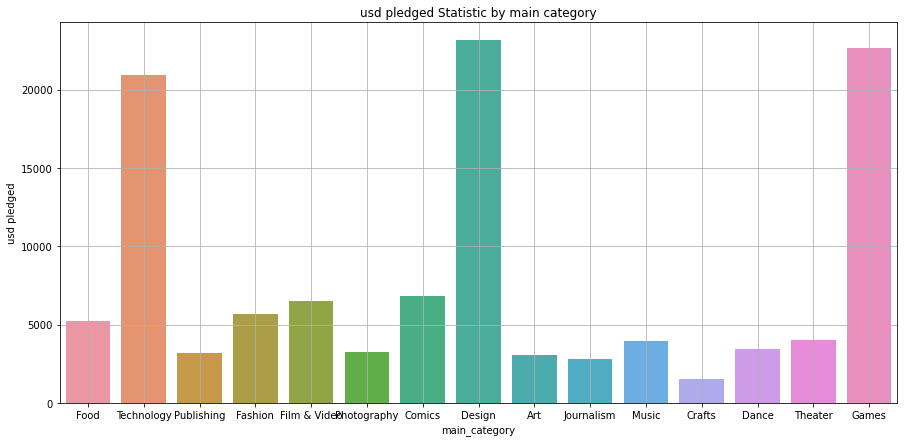

In [120]:
# visualiztions 

#Average Pledge by Main Category

plt.figure(figsize=(15,7))

sns.barplot(data = df, x = "main_category", y = "usd pledged", ci = None)

plt.title('usd pledged Statistic by main category')
plt.grid()

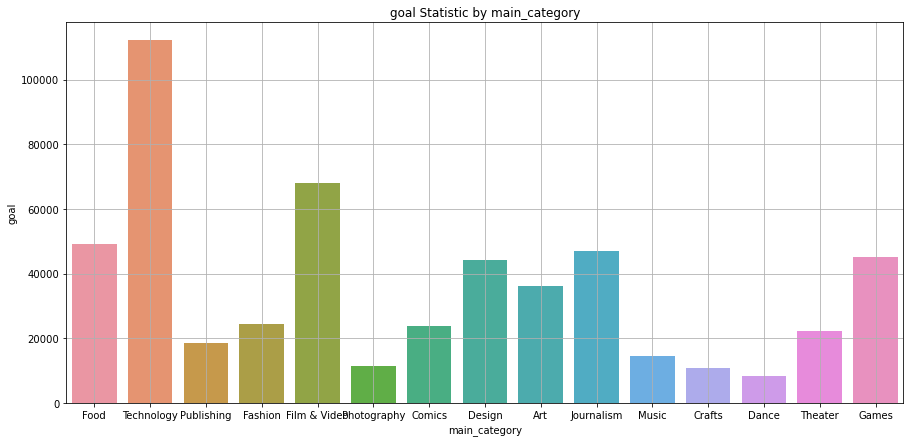

In [121]:
plt.figure(figsize=(15,7))

sns.barplot(data = df, x = "main_category", y = "goal", ci = None)

plt.title('goal Statistic by main_category')
plt.grid()

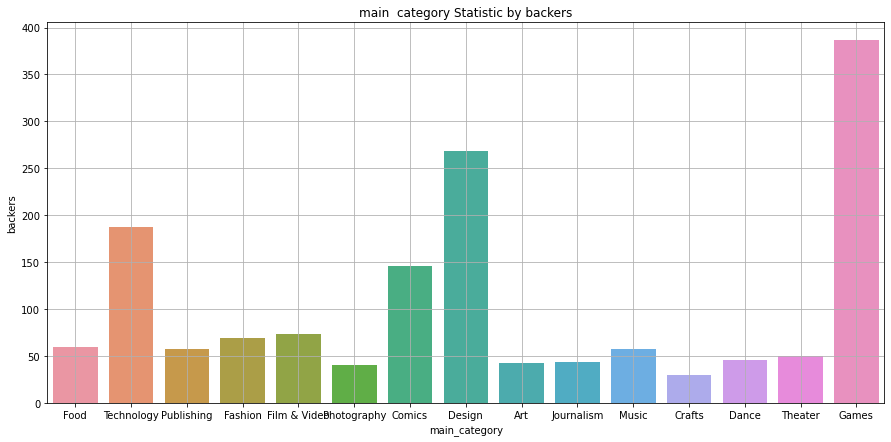

In [122]:
plt.figure(figsize=(15,7))

sns.barplot(data = df, x = "main_category", y = "backers", ci = None)

plt.title('main  category Statistic by backers')
plt.grid()

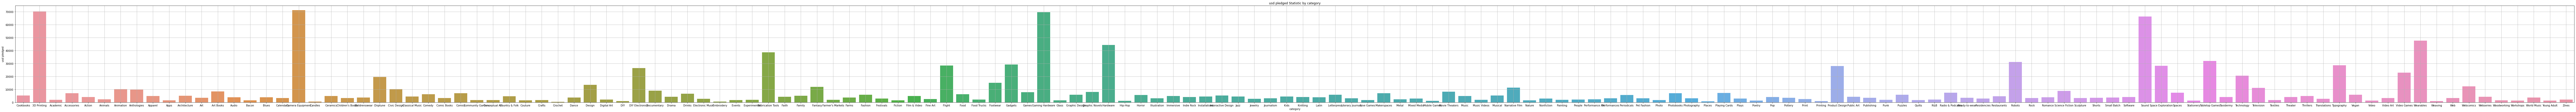

In [123]:
#Average Pledge by  Category

plt.figure(figsize=(180,7))

sns.barplot(data = df, x = "category", y = "usd pledged", ci = None)

plt.title('usd pledged Statistic by category')
plt.grid()

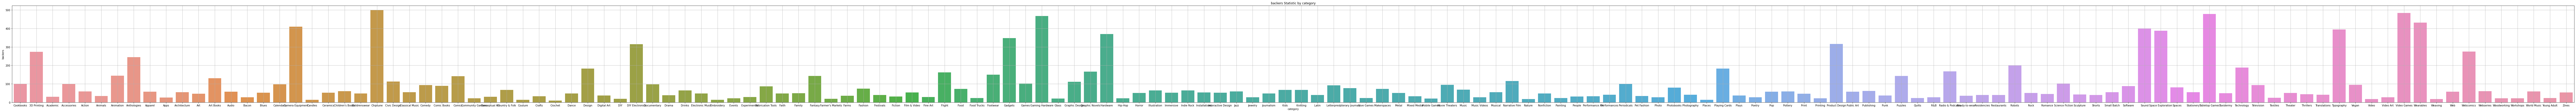

In [124]:
#Average backers by  Category

plt.figure(figsize=(180,7))

sns.barplot(data = df, x = "category", y = "backers", ci = None)

plt.title('backers Statistic by category')
plt.grid()

state
failed        35.181658
successful    32.181717
Name: length_days, dtype: float64


<AxesSubplot:title={'center':'length_days Statistic by state'}, xlabel='state', ylabel='length_days'>

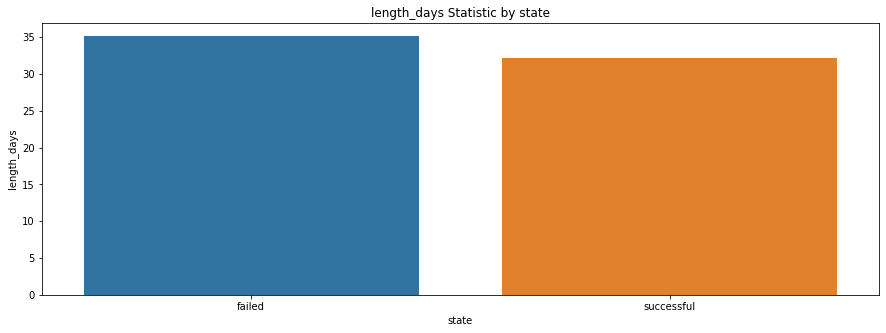

In [125]:
print(df["length_days"].groupby(df["state"]).mean())

###
plt.figure(figsize=(15,5))
plt.title('length_days Statistic by state')

sns.barplot(data = df, x = "state", y = "length_days", ci = None)

state
failed         1279.467288
successful    19442.292414
Name: usd pledged, dtype: float64


<AxesSubplot:title={'center':'usd pledged Statistic by state'}, xlabel='state', ylabel='usd pledged'>

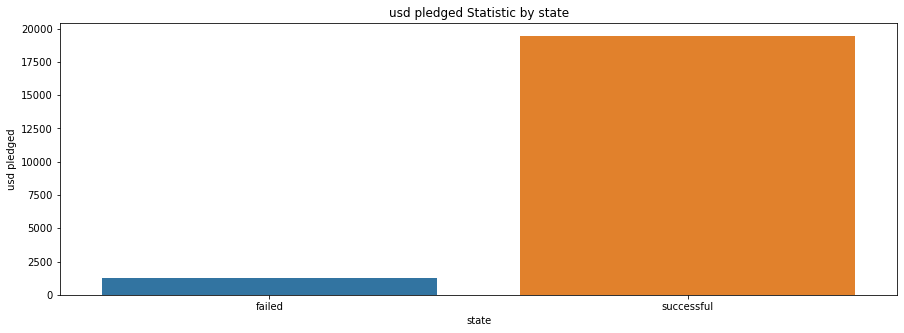

In [126]:
print(df["usd pledged"].groupby(df["state"]).mean())

###
plt.figure(figsize=(15,5))
plt.title('usd pledged Statistic by state')

sns.barplot(data = df, x = "state", y = "usd pledged", ci = None)

state
failed         16.768301
successful    253.665538
Name: backers, dtype: float64


<AxesSubplot:title={'center':'backers Statistic by state'}, xlabel='state', ylabel='backers'>

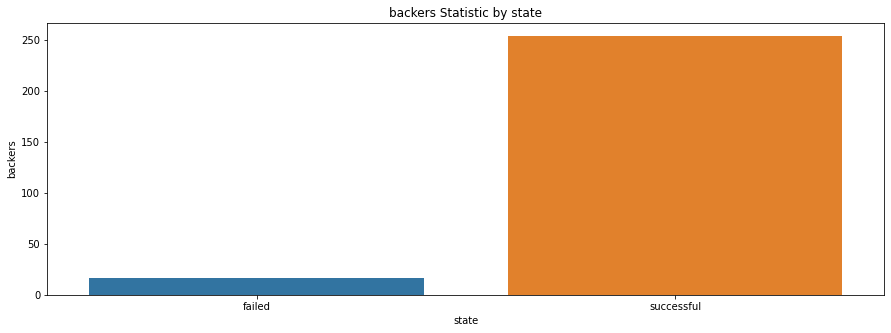

In [127]:
print(df["backers"].groupby(df["state"]).mean())

###
plt.figure(figsize=(15,5))
plt.title('backers Statistic by state')

sns.barplot(data = df, x = "state", y = "backers", ci = None)

state
failed        63432.182763
successful     9623.108753
Name: goal, dtype: float64


<AxesSubplot:title={'center':'goal Statistic by state'}, xlabel='state', ylabel='goal'>

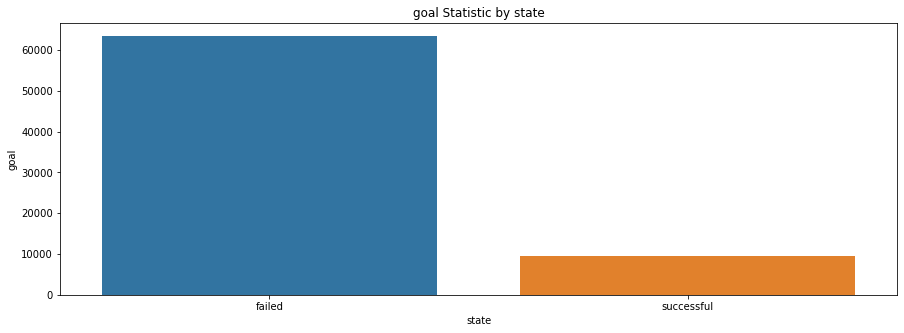

In [128]:
print(df["goal"].groupby(df["state"]).mean())

###
plt.figure(figsize=(15,5))
plt.title('goal Statistic by state')

sns.barplot(data = df, x = "state", y = "goal", ci = None)

In [129]:
df['rank backers'] = np.where(df['usd pledged'] >= 100000, 'best backers', ' backers')
df.head()

,main_category,category,country,currency,length_days,goal,usd pledged,backers,state,pct_funded,rank backers
0,Food,Cookbooks,US,USD,29,13730.0,3984.000000,46,failed,29.016752,backers
1,Technology,3D Printing,AT,EUR,35,75000.0,1561.784015,31,failed,2.082379,backers
2,Technology,3D Printing,AT,EUR,30,15000.0,4152.402045,46,failed,27.682680,backers
3,Technology,3D Printing,AT,EUR,30,20000.0,19.435528,6,failed,0.097178,backers
4,Technology,3D Printing,AT,EUR,40,20000.0,2908.076574,29,failed,14.540383,backers


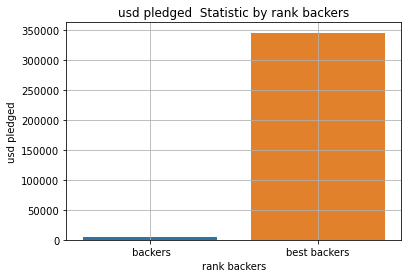

In [130]:
### creating a simple barplot to show the average usd pledged across rank backers

sns.barplot(data = df, x = "rank backers", y = "usd pledged", ci = None)

plt.title('usd pledged  Statistic by rank backers')
plt.grid()
## plt.minorticks_on() 

Text(0.5, 1.0, 'usd pledged by main_category and state')

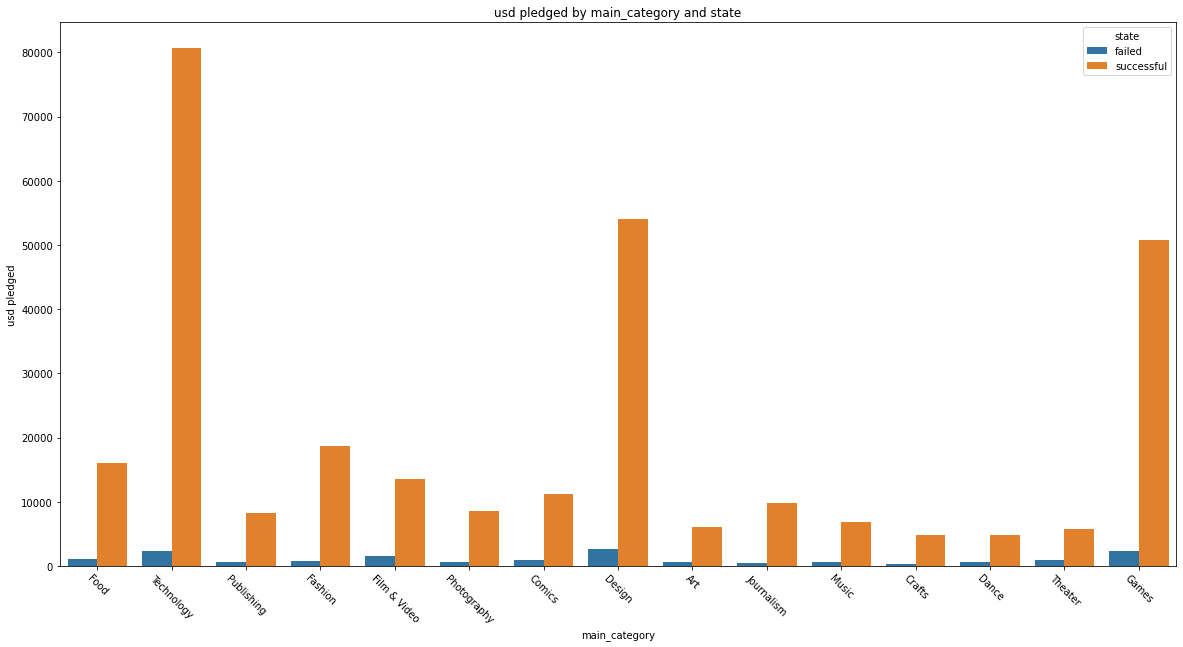

In [131]:
### create a barplot showing the average usd pledged by main_category across state  

plt.figure(figsize=(20,10))

sns.barplot(data = df, x = "main_category", y = "usd pledged", hue = "state", ci = None)

plt.xticks(rotation = -45)
plt.title('usd pledged by main_category and state')

Text(0.5, 1.0, 'backers by main_category and state')

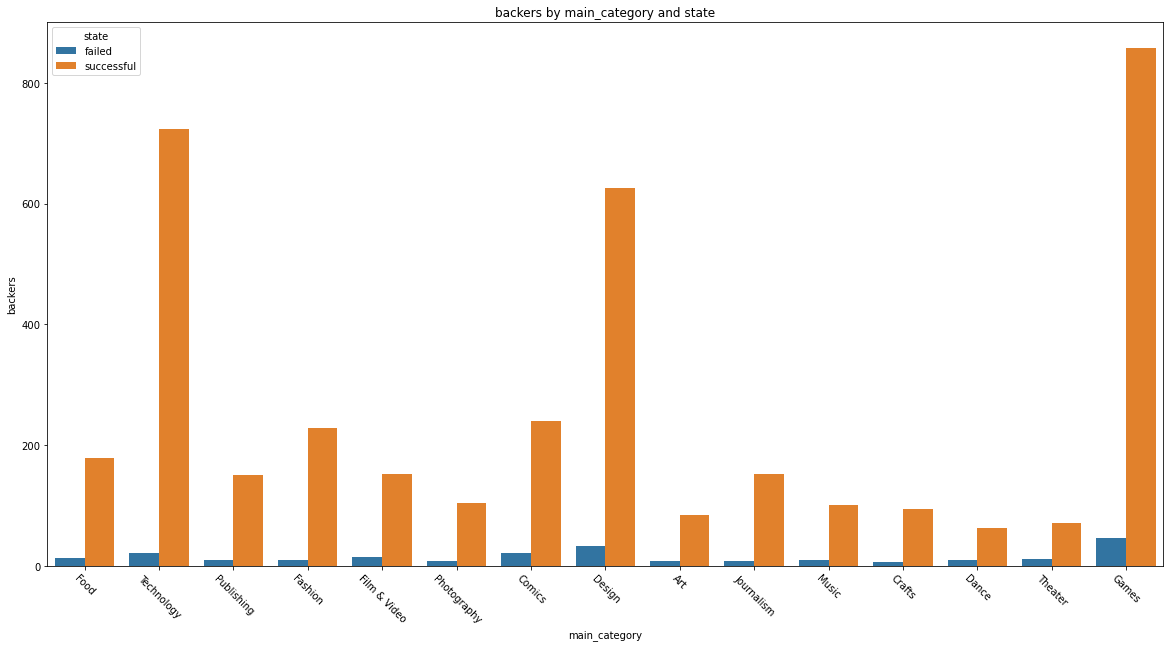

In [132]:
### create a barplot showing the average backers by main category across state 

plt.figure(figsize=(20,10))

sns.barplot(data = df, x = "main_category", y = "backers", hue = "state", ci = None)

plt.xticks(rotation = -45)
plt.title('backers by main_category and state')

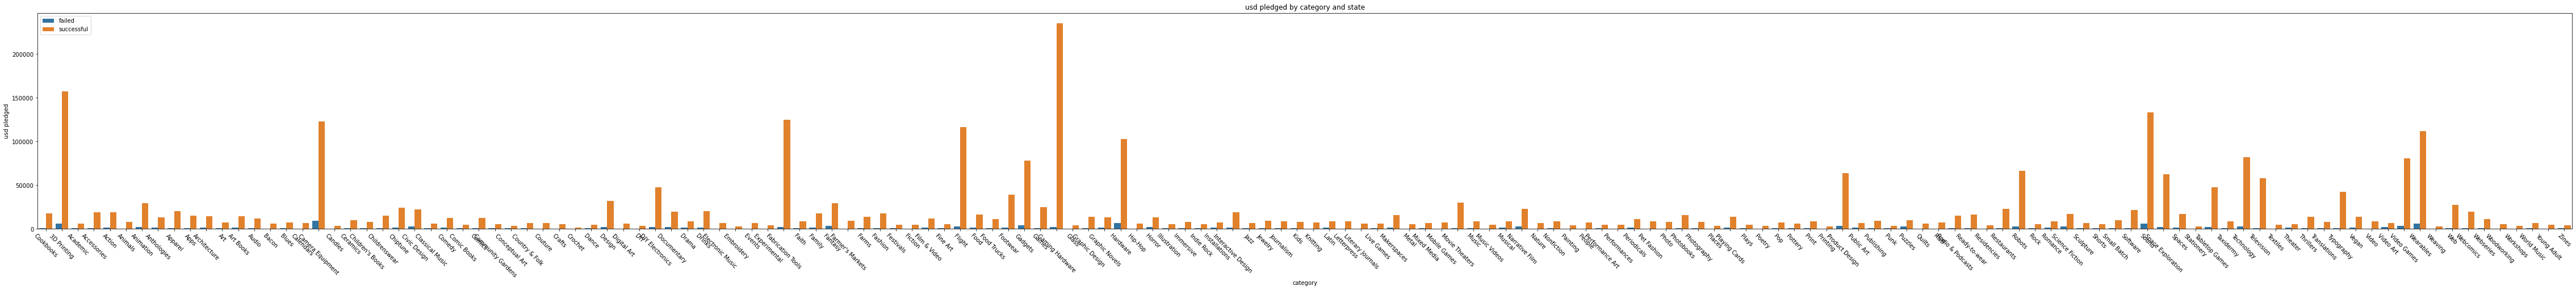

In [133]:
### create a barplot showing the average usd pledged by category  across state 

plt.figure(figsize=(80,7))

sns.barplot(data = df, x = "category", y = "usd pledged", hue = "state", ci = None)

plt.xticks(rotation = -45)

plt.title('usd pledged by category and state')
plt.legend(loc = 'upper left')

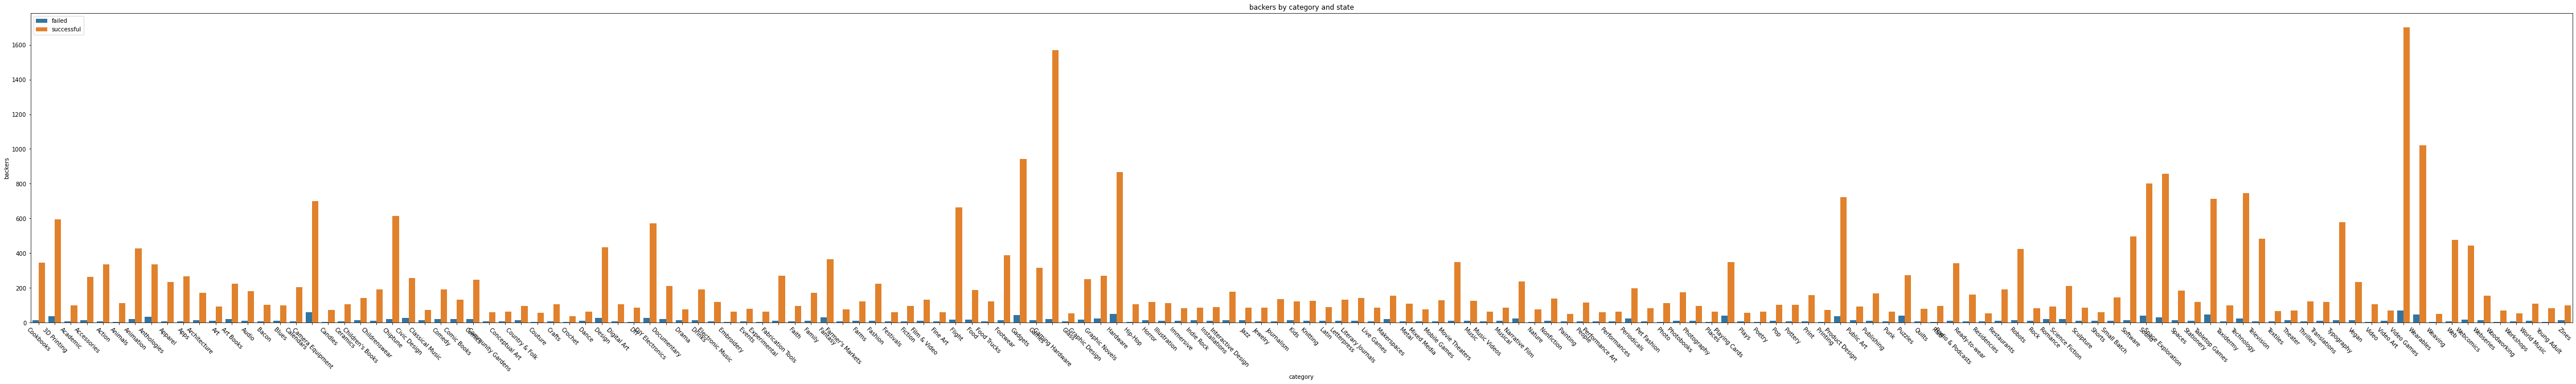

In [134]:
### create a barplot showing the average backers category across state 

plt.figure(figsize=(80,10))

sns.barplot(data = df, x = "category", y = "backers", hue = "state", ci = None)

plt.xticks(rotation = -45)
plt.title('backers by category and state')
plt.legend(loc = 'upper left')

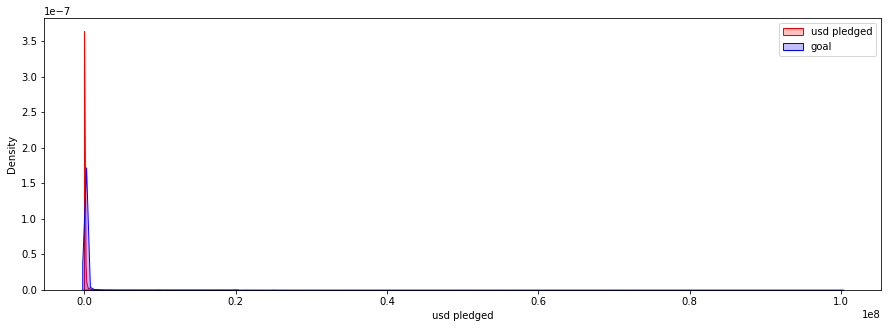

In [135]:
### plotting two density plots in the same figure 
#Density plots allow to visualize the distribution of a numeric variable for one or several groups
plt.figure(figsize=(15,5)) ## change the figure size

sns.kdeplot(df['usd pledged'], shade = True, color = "red", label = "usd pledged")
sns.kdeplot(df['goal'], shade = True, color = "blue", label = "goal")

plt.legend() ## add a legend 
plt.show() ## show both plots in the same figure 

In [136]:
## state by campaign main category (crosstab)
# hint: list 'state' second for an easier to read table

pd.crosstab(df['main_category'], df['state'],normalize = 'index')
# HINT: it's easier to understand the differences between groups by looking at percentages

state,failed,successful
main_category,,
Art,0.556203,0.443797
Comics,0.430791,0.569209
Crafts,0.734865,0.265135
Dance,0.341471,0.658529
Design,0.602187,0.397813
Fashion,0.727319,0.272681
Film & Video,0.581044,0.418956
Food,0.721308,0.278692
Games,0.581078,0.418922


In [137]:
## state by campaign sub-category (crosstab)
# hint: list 'state' second for an easier to read table

pd.crosstab(df['category'], df['state'], normalize = 'index')


# HINT: it's easier to understand the differences between groups by looking at percentages

state,failed,successful
category,,
3D Printing,0.575824,0.424176
Academic,0.749153,0.250847
Accessories,0.656502,0.343498
Action,0.844444,0.155556
Animals,0.723618,0.276382
Animation,0.695719,0.304281
Anthologies,0.300781,0.699219
Apparel,0.780760,0.219240
Apps,0.928213,0.071787


## <font color=#306EFF>Part 5: Group Presentation</font>

By now, your group should feel very comfortable with the aspects of the Kickstarter dataset. You should have a firm understanding of what Kickstarter is, what the dataset contains, the characteristics of each variable, how the variables interact with each other, and finally, which variables influence the outcome of the Kickstarter campaign. Can you put all this information together to tell a story about the data? Your presentation should include visualizations and clear answers to the two primary questions:

    1. What kinds of projects should the Kickstarter Marking Team focus their attention on?
    2. Why should the Marketing Team focus their attention in that direction?

In addition to these two questions, your presentation should cover the additional questions listed below. These questions should be easy to answer using the information you discovered above. When you are done, submit your completed notebook to me.   

### <font color=#306EFF>Questions to Answer</font>
1.	What main category is the most profitable (highest amount of money pledged)? 
2.	Which main category is the most popular (highest number of backers)?
3.	Which sub-categories are the most profitable and popular (top 3)?
4.	What are some of the characteristics of a successful Kickstarter campaign? 
5.	How does the success or failure of Kickstarter campaigns differ between main category, sub-category, country, and length of campaign? Please mention only the most notable – you do not need to detail the success/failure rate for each category/sub-category? 

***

### <font color=#306EFF>TIPS FOR A GREAT PRESENTATION</font>

* Start with the most important information (answers to the two questions above), and work backwards. The entire class will be working with the same dataset, therefore, we don't need to know the details of all your coding -- we just want to know what findings are most important to the questions. 
* Create clear visualizations. Make sure your audience can quickly and easily understand what your visualizations are showing. While you have a lot of options for how to style your visualizations, don't go overboard! 
* Make sure everyone understands what the visualization is showing; it should not have to stand on its own. When you present a visualization, you should be able to discuss what it means and what the significance is. 
* Use a single presentation format -- you can create a PowerPoint presentation or organize your notebook in a way that is easy to follow; reguardless of what your group puts together, you should use only ONE format. 

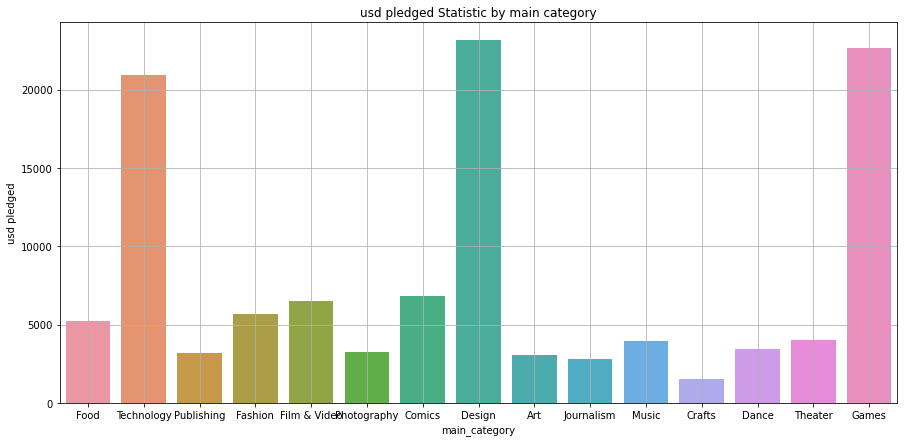

In [138]:
     # For Presentation 

#1. What kinds of projects should the Kickstarter Marking Team focus their attention on?
#2. Why should the Marketing Team focus their attention in that direction?

# from the main category kickstarter should focus on : design, games and technology which have highest usd pledged and backers
 #from the category group it focus on :equipment candle, 3D printing  and hardware which have highest usd pledged and backers                                                                                                                   
   
 #1.What main category is the most profitable (highest amount of money pledged)? 

   # design is the most profitable ,   23132.730636 usd pledged   
    
 #Average Pledge by Main Category

plt.figure(figsize=(15,7))

sns.barplot(data = df, x = "main_category", y = "usd pledged", ci = None)

plt.title('usd pledged Statistic by main category')
plt.grid()   



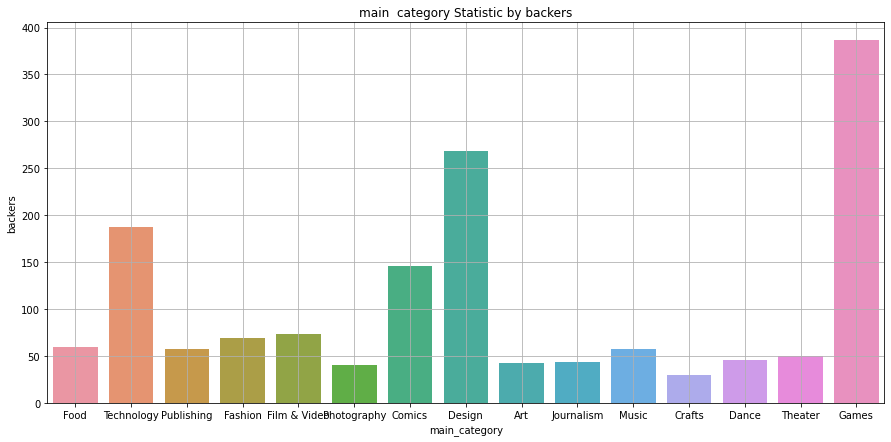

In [139]:
#2.	Which main category is the most popular (highest number of backers)?
   
      #Games  386.230282 backers


# average backers by main category

plt.figure(figsize=(15,7))

sns.barplot(data = df, x = "main_category", y = "backers", ci = None)

plt.title('main  category Statistic by backers')
plt.grid()

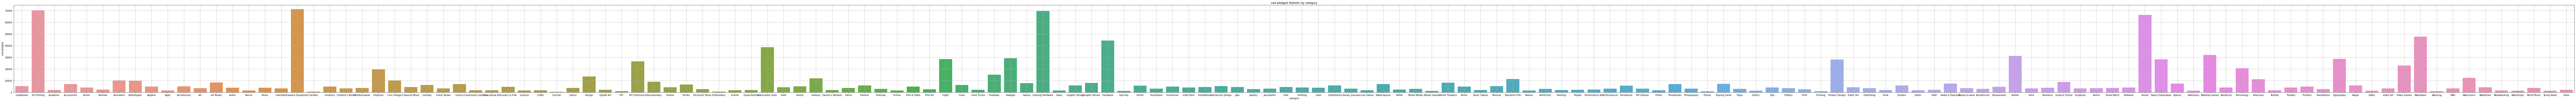

In [140]:
#3.	Which sub-categories are the most profitable and popular (top 3)?
    
#most profitables  by usd pledged: equipment candles, 3D printing and gaming hardware                    
# most popular by backers: chiptune, video games and games      
                                                        
         
 #Average Pledge by  Category

plt.figure(figsize=(200,7))

sns.barplot(data = df, x = "category", y = "usd pledged", ci = None)

plt.title('usd pledged Statistic by category')
plt.grid() 

         
         
         
         
         
         
     

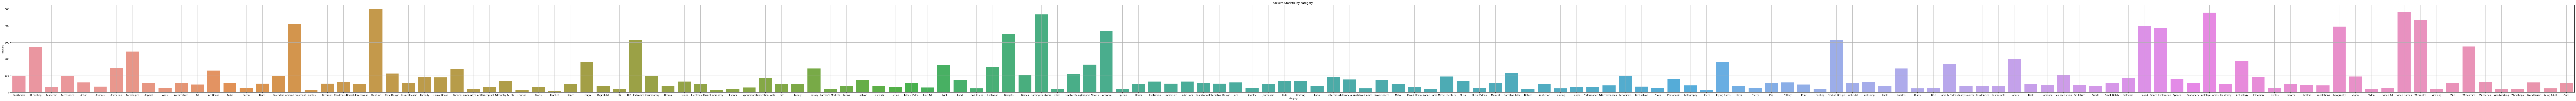

In [141]:

# most popular by backers  from category: chiptune, video games and table games      



plt.figure(figsize=(200,7))

sns.barplot(data = df, x = "category", y = "backers", ci = None)

plt.title('backers Statistic by category')
plt.grid() 


Text(0.5, 1.0, 'usd pledged by main_category and state')

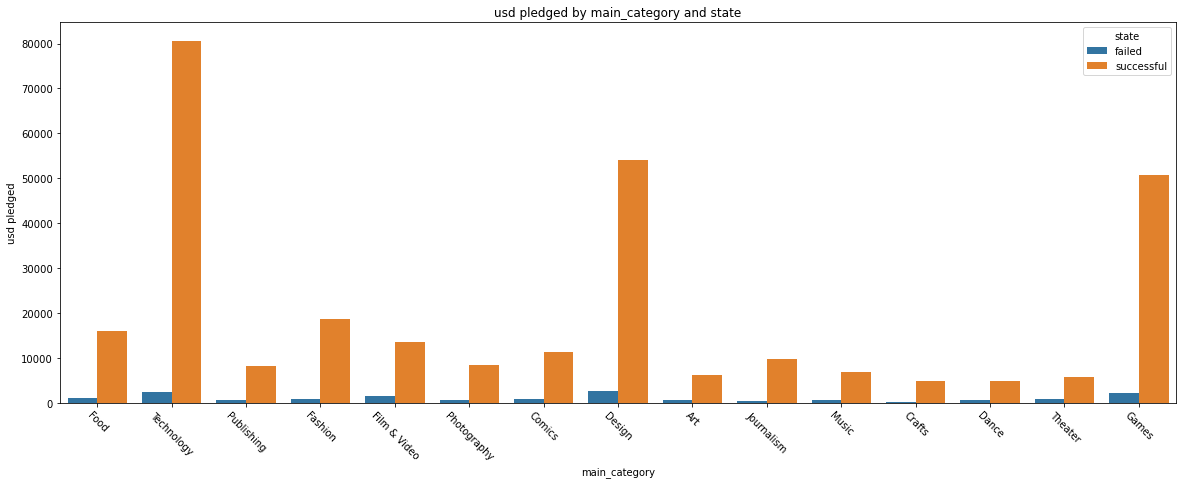

In [142]:
#4.What are some of the characteristics of a successful Kickstarter campaign? 
   
    #the kickstarter campaign interms of usd pledged and backers it is so successful
        
   
 #the average usd pledged by main_category across state

plt.figure(figsize=(20,7))

sns.barplot(data = df, x = "main_category", y = "usd pledged", hue = "state", ci = None)

plt.xticks(rotation = -45)
plt.title('usd pledged by main_category and state')







Text(0.5, 1.0, 'backers by main_category and state')

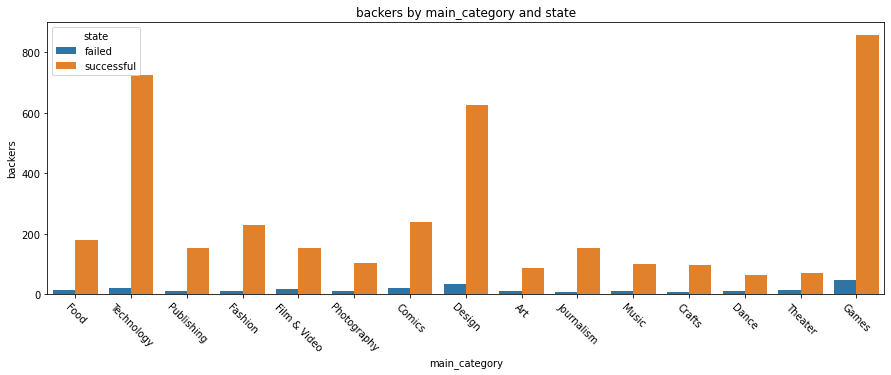

In [143]:
# kickstarter  successful characteristics based on backers:
    

### create a barplot showing the average backers by main category across state 

plt.figure(figsize=(15,5))

sns.barplot(data = df, x = "main_category", y = "backers", hue = "state", ci = None)

plt.xticks(rotation = -45)
plt.title('backers by main_category and state')

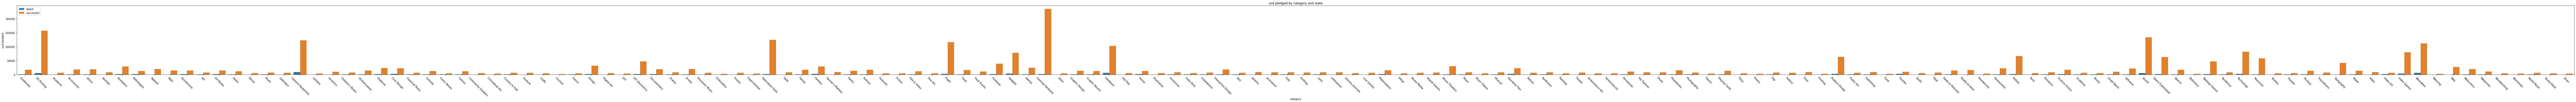

In [146]:
### create a barplot showing the average usd pledged by  category across state 


plt.figure(figsize=(180,5))

sns.barplot(data = df, x = "category", y = "usd pledged", hue = "state", ci = None)

plt.xticks(rotation = -45)
plt.title('usd pledged by category and state')
plt.legend(loc = 'upper left')

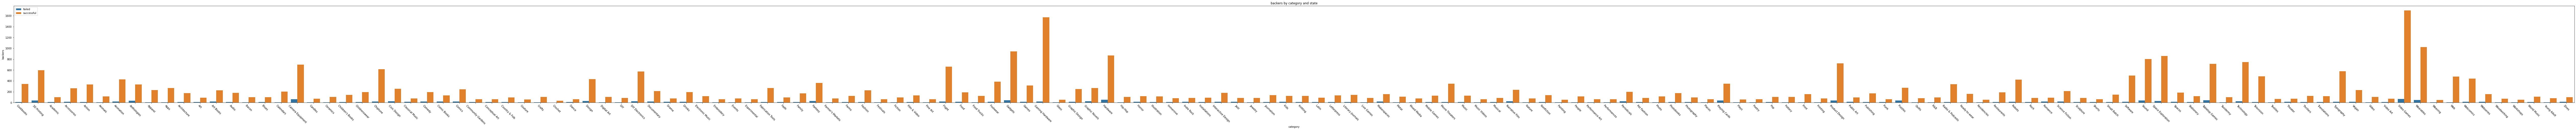

In [147]:
### create a barplot showing the average backers by category across state 



plt.figure(figsize=(180,7))

sns.barplot(data = df, x = "category", y = "backers", hue = "state", ci = None)

plt.xticks(rotation = -45)
plt.title('backers by category and state')
plt.legend(loc = 'upper left')

In [148]:
 #5.How does the success or failure of Kickstarter campaigns differ between main category, sub-category, country, and length of campaign? Please mention only the most notable – you do not need to detail the success/failure rate for each category/sub-category? 
  #(see above and below plots)
    
#the success or failure of the campaign in  main category an, sub category and countries differs based on the amonut of usd pledged and number of backers for the projects.those who have more usd pledged and backers have been successful. 
 
# those who have more usd pledged and backers have been successful in main category, sub category and the country level. 
#the length of the campaign did not bring a big difference on the success and failure of the campaign.     
    



In [149]:
df.groupby(df['state']).mean()

,length_days,goal,usd pledged,backers,pct_funded
state,,,,,
failed,35.181658,63432.182763,1279.467288,16.768301,8.894607
successful,32.181717,9623.108753,19442.292414,253.665538,674.295756


state
failed         1279.467288
successful    19442.292414
Name: usd pledged, dtype: float64


<AxesSubplot:title={'center':'usd pledgedStatistic by state'}, xlabel='state', ylabel='usd pledged'>

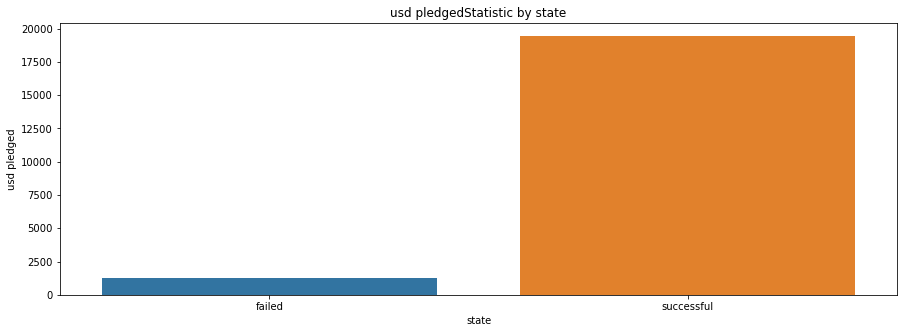

In [150]:
print(df["usd pledged"].groupby(df["state"]).mean())

###
plt.figure(figsize=(15,5))
plt.title('usd pledgedStatistic by state')

sns.barplot(data = df, x = "state", y = "usd pledged", ci = None)

state
failed         16.768301
successful    253.665538
Name: backers, dtype: float64


<AxesSubplot:title={'center':'backers Statistic by state'}, xlabel='state', ylabel='backers'>

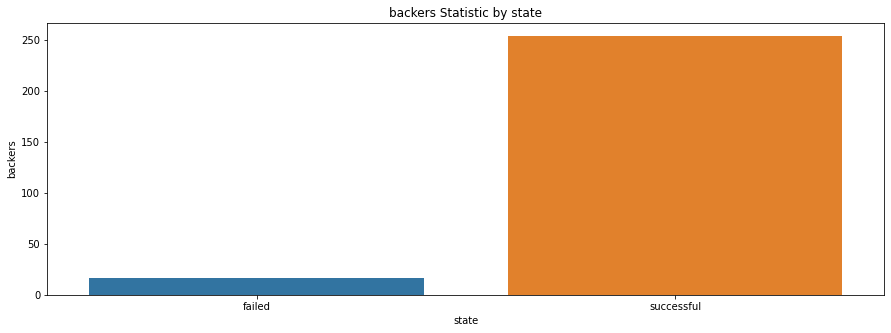

In [151]:
print(df["backers"].groupby(df["state"]).mean())

###
plt.figure(figsize=(15,5))
plt.title('backers Statistic by state')

sns.barplot(data = df, x = "state", y = "backers", ci = None)

state
failed        35.181658
successful    32.181717
Name: length_days, dtype: float64


<AxesSubplot:title={'center':'length_days Statistic by state'}, xlabel='state', ylabel='length_days'>

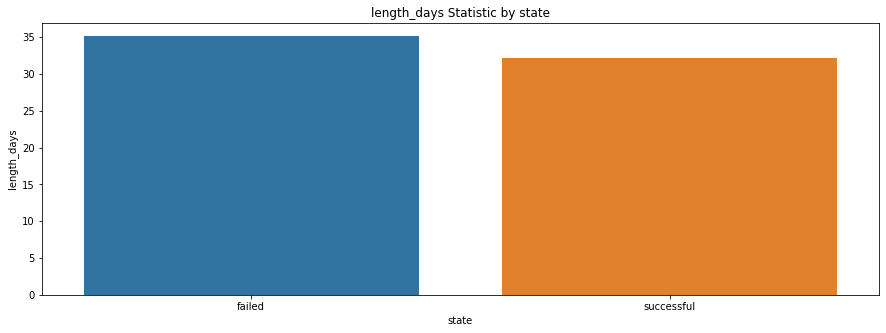

In [152]:
print(df["length_days"].groupby(df["state"]).mean())

###
plt.figure(figsize=(15,5))
plt.title('length_days Statistic by state')

sns.barplot(data = df, x = "state", y = "length_days", ci = None)

state
failed          8.894607
successful    674.295756
Name: pct_funded, dtype: float64


<AxesSubplot:title={'center':'pct_funded Statistic by state'}, xlabel='state', ylabel='pct_funded'>

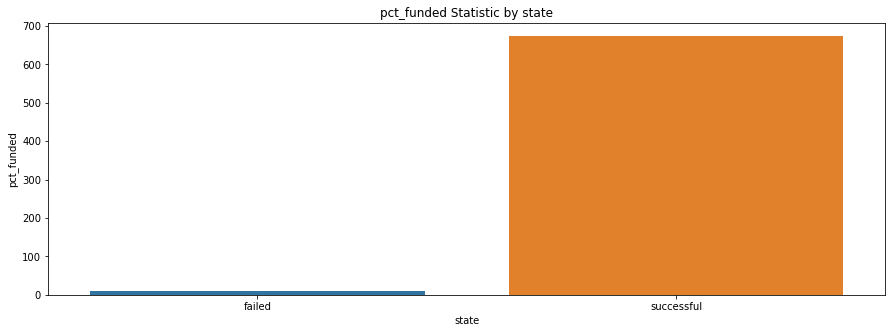

In [153]:
print(df["pct_funded"].groupby(df["state"]).mean())

###
plt.figure(figsize=(15,5))
plt.title('pct_funded Statistic by state')

sns.barplot(data = df, x = "state", y = "pct_funded", ci = None)

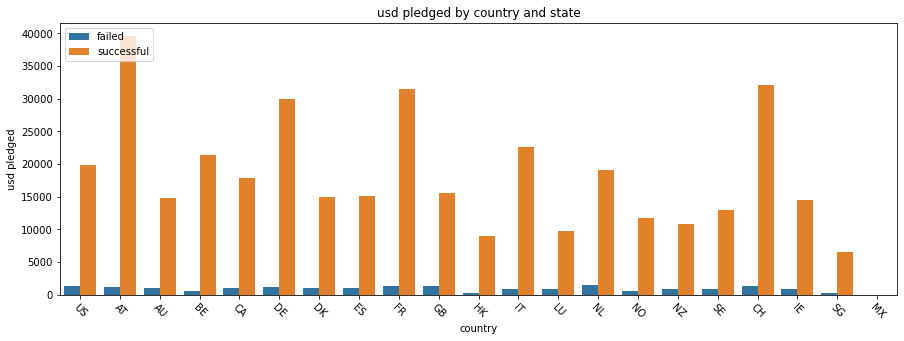

In [154]:

### create a barplot showing the average usd pledged by country across state 


plt.figure(figsize=(15,5))

sns.barplot(data = df, x = "country", y = "usd pledged", hue = "state", ci = None)

plt.xticks(rotation = -45)
plt.title('usd pledged by country and state')
plt.legend(loc = 'upper left')

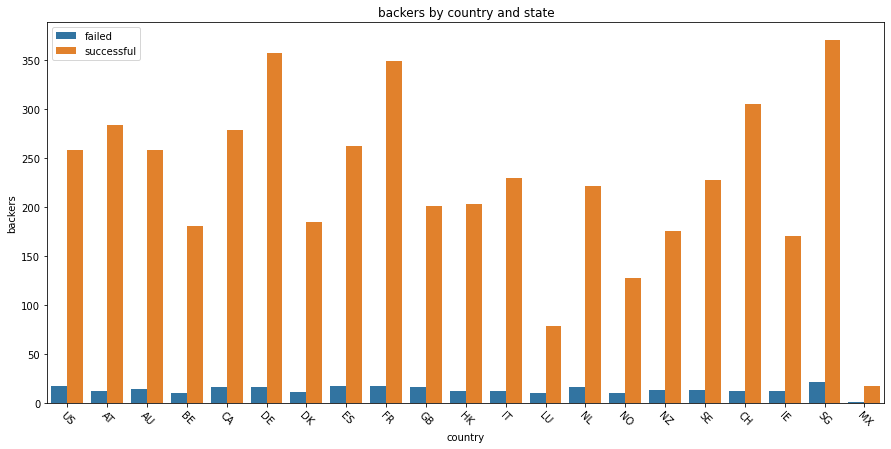

In [155]:
### create a barplot showing the average backers by country across state 



plt.figure(figsize=(15,7))

sns.barplot(data = df, x = "country", y = "backers", hue = "state", ci = None)

plt.xticks(rotation = -45)
plt.title('backers by country and state')
plt.legend(loc = 'upper left')

state
failed        63432.182763
successful     9623.108753
Name: goal, dtype: float64


<AxesSubplot:title={'center':'goal Statistic by state'}, xlabel='state', ylabel='goal'>

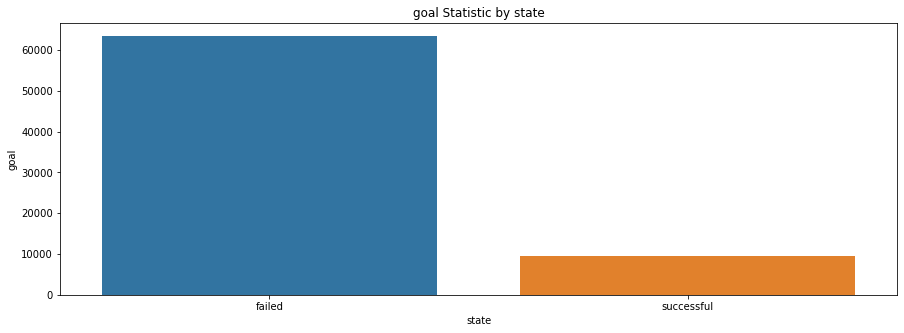

In [156]:
print(df["goal"].groupby(df["state"]).mean())

###
plt.figure(figsize=(15,5))
plt.title('goal Statistic by state')

sns.barplot(data = df, x = "state", y = "goal", ci = None)

In [157]:
df['state'].value_counts()

failed        168503
successful    113143
Name: state, dtype: int64

rank backers
 backers          4502.613621
best backers    345426.908170
Name: usd pledged, dtype: float64


<AxesSubplot:title={'center':'usd pledged Statistic by rank backers'}, xlabel='rank backers', ylabel='usd pledged'>

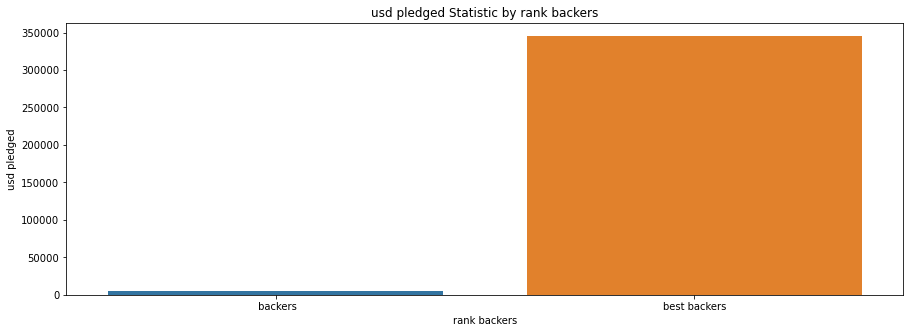

In [158]:
print(df["usd pledged"].groupby(df["rank backers"]).mean())

###
plt.figure(figsize=(15,5))
plt.title('usd pledged Statistic by rank backers')

sns.barplot(data = df, x = "rank backers", y = "usd pledged", ci = None)